회귀분석-자동차 연비 예측 분석

## 1) 데이터 수집

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_df = pd.read_csv('auto-mpg.csv')

In [ ]:
data_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


## 2) 데이터 준비 및 탐색

In [ ]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df.head()

 데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### - 분석하지 않을 변수 제외하기

In [ ]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)

In [ ]:
print(' 데이터세트 크기 : ', data_df.shape)

data_df.head()

 데이터세트 크기 :  (398, 6)


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


## 3) 분석 모델 구축

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [ ]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [ ]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [ ]:
print(Y_predict)

[12.68813886 24.89235692 11.77966226 20.713484   17.59974974 28.70463932
 31.8246109  24.79459783 13.3797074  28.03809202 33.95480562 32.517138
 21.28643713 26.32547953 16.29305741 32.16905355 30.04731897 29.90617451
 17.78110613 30.69577551 15.33574367 25.60299563 25.4723533  20.04730443
 30.70244174 26.79576507 32.20306918 31.95533215 30.42830733 18.19432511
 21.19981862 29.62938625 20.86352443 30.82503708 24.35511863 23.81034331
 21.45816755 16.77101118 31.95362794  8.06590693  9.60178767 13.8699291
 27.26165312 29.00102026 29.52364892 22.58571769 23.20233694 13.80533693
 23.86039376 28.12535283 31.40954528 26.70297991 15.34381889 25.01897062
 14.71481708  9.53883961 19.64272577 26.82491432 31.30917854 14.99268593
 20.64360774 25.57610711 22.45200894 19.72033566 10.7918702  11.42513414
  9.7023088  19.68724093 24.98227534  9.68717343 33.31781779 10.21150582
 20.84069925 19.27272978 22.433523   29.31460799 28.98886268 28.57314167
 29.70646598 16.24391797 12.49894224 27.56814445 31.31

## 4) 결과 분석 및 시각화

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [ ]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [ ]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

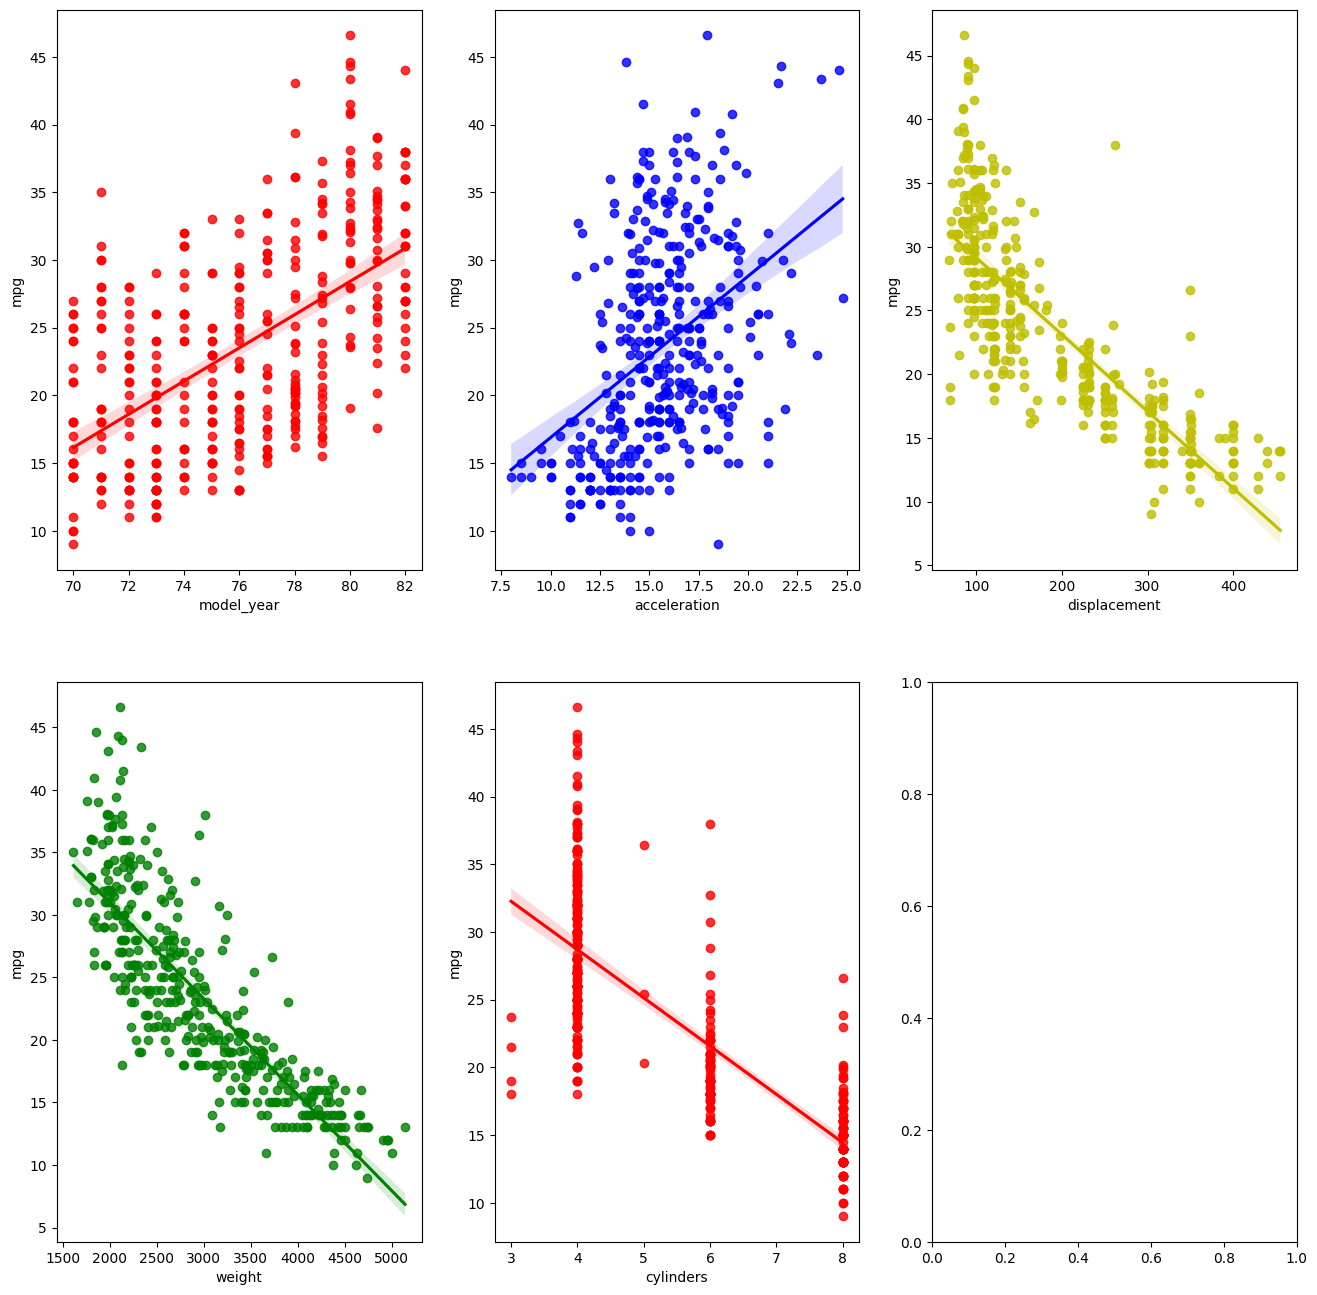

In [ ]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

###   <<<< 연비 예측하기  >>>>

In [ ]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 6
displacement : 300
weight : 4000
acceleration : 15
model_year : 80


In [ ]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 19.93 입니다.
